# Apply machine learning on a spherical subdomain

## Authors & Contributors

### Authors

- Jean-Marc Delouis, LOPS - Laboratoire d'Oceanographie Physique et Spatiale UMR 6523 CNRS-IFREMER-IRD-Univ.Brest,
- Tina Odaka, Laboratoire d'Oceanographie Physique et Spatiale UMR 6523 CNRS-IFREMER-IRD-Univ.Brest,
- Justus Mangin, Laboratoire d'Oceanographie Physique et Spatiale UMR 6523 CNRS-IFREMER-IRD-Univ.Brest,

## Context

This notebook demonstrates the use of the **FOSCAT** package to produce machine learning statistical information on a subdomain of the sphere. While the ability to work on a global domain has already been demonstrated, this version uses the **healpix-convolution** package, which is designed to perform local convolutions on the sphere efficiently. Previously, the **FOSCAT** package worked with the HEALPix grid, but convolutions were always performed over the full domain. In contrast, the use of the **healpix-convolution** package, also using HEALPix grid, now enables efficient local convolutions and allows working with very high-resolution HEALPix grids ($N_{\text{side}} \gg 512$).

### Workflow Steps

The goal here is to showcase **FOSCAT**’s ability to operate on a limited domain—specifically, a coastal region in Sea Surface Temperature data. The initial steps demonstrate smoothing and wavelet decomposition of the signal. Subsequent steps illustrate **FOSCAT**’s capability to compute the spherical **scattering covariance** [1] on this localized domain.

### For further details, please refer to:

[1] Mousset, L., Allys, E., Pric, M. A., Aumo, J., Delouis, J.-M., Montier, L., McEwen, J. D., *Submitted 2024, Astronomy & Astrophysics*.

### Aknowledges

The local convolution has recived the financial support from CNES (R&T).

## What is HEALPix

HEALPix stands for Hierarchical Equal Area isoLatitude Pixelation of a sphere. This pixelation produces a subdivision of a spherical surface in which each pixel covers the same surface area as every other pixel. 
![HEALPix](https://healpix.sourceforge.io/images/gorski_f1.jpg)

See [https://healpix.sourceforge.io](https://healpix.sourceforge.io) and/or [the HEALPix Primer](https://healpix.jpl.nasa.gov/pdf/intro.pdf) for more information.

The [healpy tutorial](https://healpy.readthedocs.io/en/latest/tutorial.html#NSIDE-and-ordering) is also a very good starting point to understand more about HEALPix.

### Resolution
The resolution of the grid is expressed by the parameter `$N_{side}$`, which defines the number of divisions along the side of a base-resolution pixel that is needed to reach a desired high-resolution partition.

### Ordering Systems

HEALPix supports two pixel ordering systems: `nested` and `ring`.

Detailed explanations of the two pixel ordering systems can be found at [https://healpix.jpl.nasa.gov/html/intronode4.htm](https://healpix.jpl.nasa.gov/html/intronode4.htm).


<style>
  /* Container to keep the table at a constant width and centered */
  .table-wrap {
    width: 880px;           /* fixed width regardless of screen size */
    margin: 1rem auto;      /* center horizontally */
  }

  /* Core table styling */
  table.nice-table {
    width: 100%;
    border-collapse: collapse;
    border: 2px solid #333;           /* thicker outer border */
    font-family: system-ui, -apple-system, Segoe UI, Roboto, Ubuntu, Cantarell, "Helvetica Neue", Arial, "Noto Sans", "Apple Color Emoji", "Segoe UI Emoji", "Segoe UI Symbol";
    font-size: 14px;
    table-layout: fixed;              /* consistent column widths */
  }

  table.nice-table thead th {
    background: #f2f2f2;
    border-bottom: 2px solid #333;    /* thicker header bottom line */
    padding: 8px 10px;
    text-align: center;
  }

  /* Vertical lines between columns */
  table.nice-table th, table.nice-table td {
    border-right: 1px solid #999;
  }
  table.nice-table th:last-child,
  table.nice-table td:last-child {
    border-right: none;
  }

  /* Zebra striping */
  table.nice-table tbody tr:nth-child(odd)  { background: #ffffff; }
  table.nice-table tbody tr:nth-child(even) { background: #f8f8f8; }

  /* Hover highlight (optional) */
  table.nice-table tbody tr:hover { background: #eaf3ff; }

  /* Cell padding & alignment */
  table.nice-table tbody td {
    padding: 6px 10px;
    vertical-align: middle;
  }

  /* Right-align numbers, monospace for consistent digit width */
  .num { text-align: right; font-variant-numeric: tabular-nums; font-family: ui-monospace, SFMono-Regular, Menlo, Monaco, Consolas, "Liberation Mono", "Courier New", monospace; }
  .center { text-align: center; }
</style>

<div class="table-wrap">
  <table class="nice-table">
    <thead>
      <tr>
        <th>level</th>
        <th>Number of cells</th>
        <th>area [m²]</th>
        <th>edge length [m]</th>
      </tr>
    </thead>
    <tbody>
      <tr><td class="num">0</td><td class="num">12</td><td class="num">42 506 000 000 000.0000</td><td class="num">6 519 662.5680</td></tr>
      <tr><td class="num">1</td><td class="num">48</td><td class="num">10 626 500 000 000.0000</td><td class="num">3 259 831.2840</td></tr>
      <tr><td class="num">2</td><td class="num">192</td><td class="num">2 656 625 000 000.0000</td><td class="num">1 629 915.6420</td></tr>
      <tr><td class="num">3</td><td class="num">768</td><td class="num">664 156 250 000.0000</td><td class="num">814 957.8210</td></tr>
      <tr><td class="num">4</td><td class="num">3 072</td><td class="num">166 039 062 500.0000</td><td class="num">407 478.9105</td></tr>
      <tr><td class="num">5</td><td class="num">12 288</td><td class="num">41 509 765 625.0000</td><td class="num">203 739.4552</td></tr>
      <tr><td class="num">6</td><td class="num">49 152</td><td class="num">10 377 441 406.2500</td><td class="num">101 869.7276</td></tr>
      <tr><td class="num">7</td><td class="num">196 608</td><td class="num">2 594 360 351.5625</td><td class="num">50 934.8638</td></tr>
      <tr><td class="num">8</td><td class="num">786 432</td><td class="num">648 590 087.8906</td><td class="num">25 467.4319</td></tr>
      <tr><td class="num">9</td><td class="num">3 145 728</td><td class="num">162 147 521.9727</td><td class="num">12 733.7160</td></tr>
      <tr><td class="num">10</td><td class="num">12 582 912</td><td class="num">40 536 880.4932</td><td class="num">6 366.8580</td></tr>
      <tr><td class="num">11</td><td class="num">50 331 648</td><td class="num">10 134 220.1233</td><td class="num">3 183.4290</td></tr>
      <tr><td class="num">12</td><td class="num">201 326 592</td><td class="num">2 533 555.0308</td><td class="num">1 591.7145</td></tr>
      <tr><td class="num">13</td><td class="num">805 306 368</td><td class="num">633 388.7577</td><td class="num">795.8572</td></tr>
      <tr><td class="num">14</td><td class="num">3 221 225 472</td><td class="num">158 347.1894</td><td class="num">397.9286</td></tr>
      <tr><td class="num">15</td><td class="num">12 884 901 888</td><td class="num">39 586.7974</td><td class="num">198.9643</td></tr>
      <tr><td class="num">16</td><td class="num">51 539 607 552</td><td class="num">9 896.6993</td><td class="num">99.4822</td></tr>
      <tr><td class="num">17</td><td class="num">206 158 430 208</td><td class="num">2 474.1748</td><td class="num">49.7411</td></tr>
      <tr><td class="num">18</td><td class="num">824 633 720 832</td><td class="num">618.5437</td><td class="num">24.8705</td></tr>
      <tr><td class="num">19</td><td class="num">3 298 534 883 328</td><td class="num">154.6359</td><td class="num">12.4353</td></tr>
      <tr><td class="num">20</td><td class="num">13 194 139 533 312</td><td class="num">38.6590</td><td class="num">6.2176</td></tr>
      <tr><td class="num">21</td><td class="num">52 776 558 133 248</td><td class="num">9.6647</td><td class="num">3.1088</td></tr>
      <tr><td class="num">22</td><td class="num">211 106 232 532 992</td><td class="num">2.4162</td><td class="num">1.5544</td></tr>
      <tr><td class="num">23</td><td class="num">844 424 930 131 968</td><td class="num">0.6040</td><td class="num">0.7772</td></tr>
      <tr><td class="num">24</td><td class="num">3 377 699 720 527 872</td><td class="num">0.1510</td><td class="num">0.3886</td></tr>
      <tr><td class="num">25</td><td class="num">13 510 798 882 111 488</td><td class="num">0.0377</td><td class="num">0.1943</td></tr>
      <tr><td class="num">26</td><td class="num">54 043 195 528 445 952</td><td class="num">0.0094</td><td class="num">0.0972</td></tr>
      <tr><td class="num">27</td><td class="num">216 172 782 113 783 808</td><td class="num">0.0024</td><td class="num">0.0486</td></tr>
      <tr><td class="num">28</td><td class="num">864 691 128 455 135 232</td><td class="num">0.0006</td><td class="num">0.0243</td></tr>
      <tr><td class="num">29</td><td class="num">3 458 764 513 820 540 928</td><td class="num">0.0001</td><td class="num">0.0121</td></tr>
    </tbody>
  </table>
</div>


### choose the resolution

we use $nside=2048$ in this context to prevent excessive computation we use the `nested`ordering.

### Get the proper packages

In [1]:
import numpy as np
import foscat.scat_cov as sc
import matplotlib.pyplot as plt
import sys
import healpy as hp
import foscat.Synthesis as synthe
import xarray as xr

### Call the data

The data are into a zarr file in order to make them easy to analyse and compute.

In [2]:
import fsspec

fs = fsspec.filesystem("http")
ds=xr.open_zarr('https://data-taos.ifremer.fr/EGU25_CFOSAT/MARS_SST_EX.zarr')
ds

<xarray.Dataset> Size: 90MB
Dimensions:    (time: 24, depth: 8, latitude: 180, longitude: 324)
Coordinates:
  * depth      (depth) float32 32B 0.494 1.541 2.646 3.819 ... 6.441 7.93 9.573
  * latitude   (latitude) float32 720B 46.03 46.05 46.08 ... 50.94 50.97 51.0
  * longitude  (longitude) float32 1kB -7.999 -7.971 -7.944 ... 0.9456 0.9733
  * time       (time) datetime64[ns] 192B 2025-03-20 ... 2025-03-20T23:00:00
Data variables:
    thetao     (time, depth, latitude, longitude) float64 90MB dask.array<chunksize=(1, 1, 180, 324), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    comment:      
    contact:      https://marine.copernicus.eu/contact
    institution:  NOW Systems (Spain)
    references:   http://marine.copernicus.eu/
    source:       NEMO3.6
    title:        Ocean 3D hourly mean fields for the Iberia-Biscay-Ireland (...

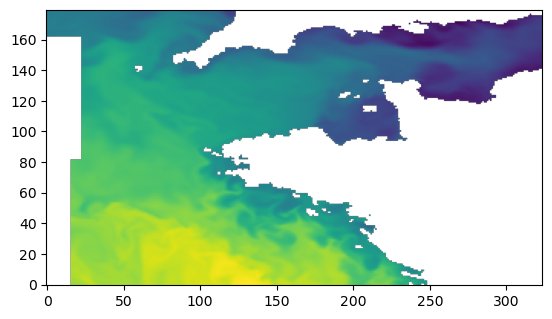

In [3]:
# plot the data
plt.imshow(ds.thetao.compute().values[12,0],origin='lower')

### Convert the data to HEALPix

Here, to convert the data onto a HEALPix grid, we use a 2D interpolation based on the HEALPix indices corresponding to the input grid. 

One of the main difficulties lies in the fact that the input grid is affected by **local tangential distortions**, which can lead to some HEALPix pixels not being sampled. 

To address this issue, we apply a small trick to ensure that **all relevant HEALPix pixels are selected**, even in regions where the mapping might otherwise miss some.

In [4]:
# Define the HEALPix resolution
nside = 2048
data = ds.thetao.compute().values[12,0,:,:]
longitude=np.tile(ds.longitude.compute().values,data.shape[0])
latitude=np.repeat(ds.latitude.compute().values,data.shape[1])
import foscat.HealSpline as HS

level=int(np.log2(nside)) # nside=128

sp = HS.heal_spline(level, gamma=1.5)

data=data.flatten()
longitude=360.0-longitude[~np.isnan(data)]
latitude=90.0-latitude[~np.isnan(data)]
data=data[~np.isnan(data)]

sp.Fit(data, np.deg2rad(latitude),np.deg2rad(longitude))
cell_ids=np.unique(hp.ang2pix(nside,np.deg2rad(latitude),np.deg2rad(longitude),nest=True))
t,p=hp.pix2ang(nside,cell_ids,nest=True)
data=sp.Transform(t,p)

Iter 000: residual = 2.247e+00
Iter 050: residual = 3.846e-02


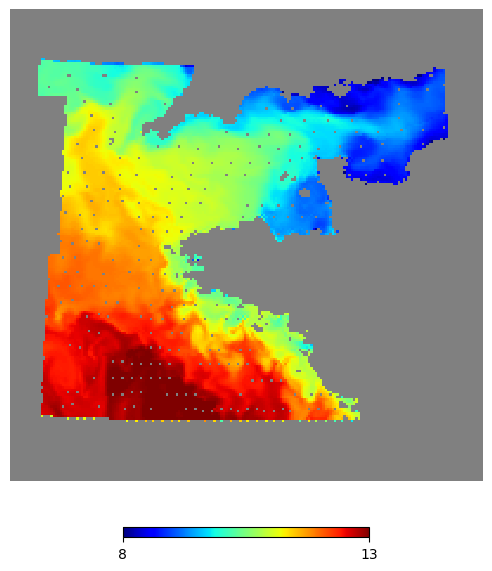

In [5]:
def plot_result(data,cell_ids,nside,hold=None,sub=None,title=None,unit=None,vmin=None,vmax=None):
    im=np.ones([12*nside**2])*hp.UNSEEN
    im[cell_ids]=data
    if vmin is None:
        vmin=data.min()
    if vmax is None:
        vmax=data.max()
    hp.gnomview(im,cmap='jet',nest=True,rot=[3.4,48.5],reso=2,hold=hold,sub=sub,notext=True,title=title,unit=unit,min=vmin,max=vmax)

plot_result(data,cell_ids,nside,vmin=8,vmax=13)

# Load the **FOSCAT** package

This command initializes all necessary components.

In this demo, the backend used is **Torch**. The **TensorFlow** backend is not yet optimized for local HEALPix operations.

In [6]:
scat=sc.funct(all_type='float64',BACKEND='torch')

### Use **FOSCAT** to smooth the data

To perform multiscale computations, **FOSCAT** requires an initial smoothing step. This step is demonstrated here.

An important point to note is the use of padding, which ensures proper smoothing at the boundaries of the field.

/srv/conda/envs/notebook/lib/python3.12/site-packages/foscat/BkTorch.py:349: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1750199048837/work/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  return self.backend.sparse_coo_tensor(indice.T, w, dense_shape).to_sparse_csr().to(self.torch_device)


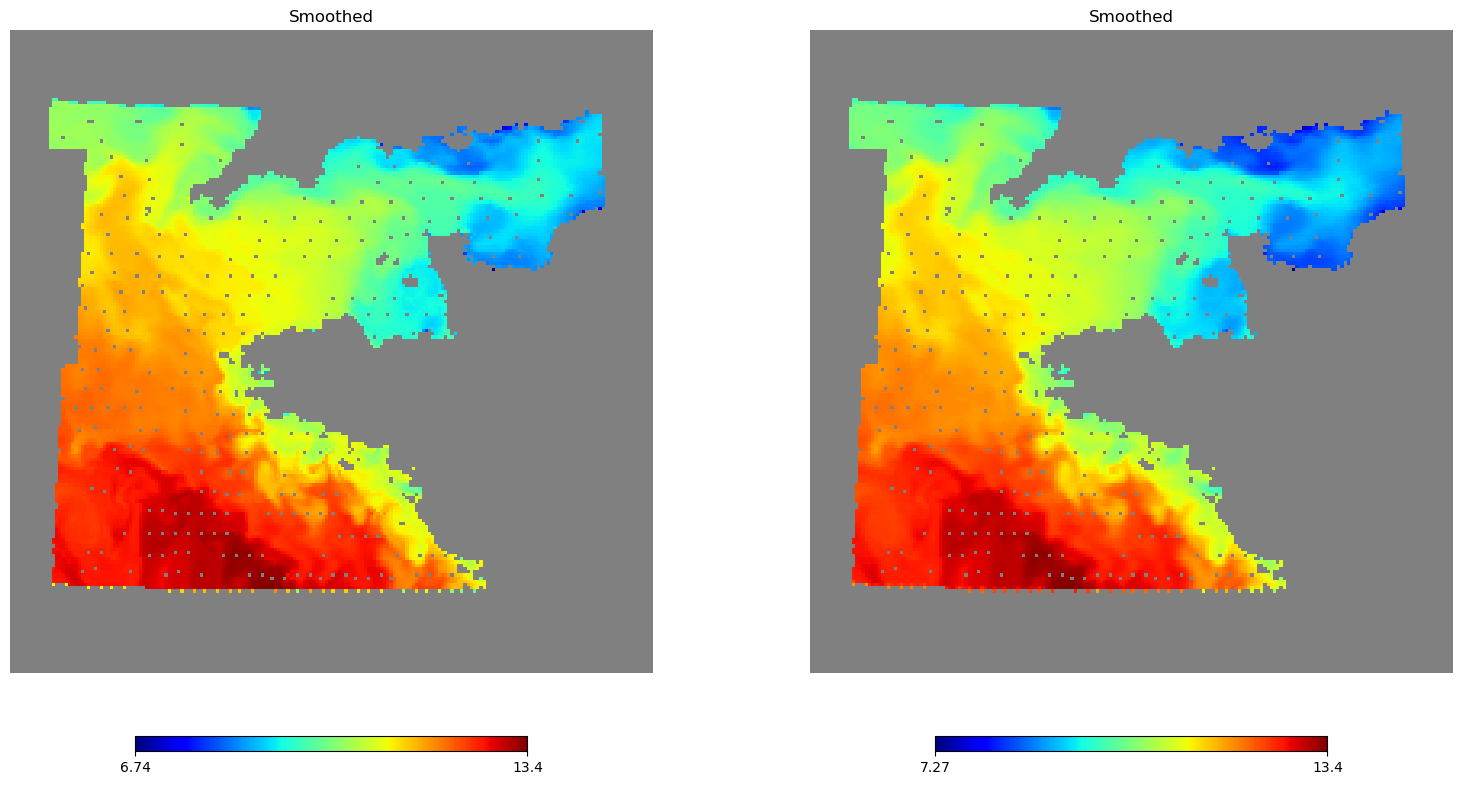

In [7]:
#compute smoothed image
smoothed_image = scat.smooth(scat.backend.bk_cast(data[None,:]),cell_ids=cell_ids,nside=nside)

#plot smoothed and unsmoothed images
plt.figure(figsize=(16,8))
plot_result(data,cell_ids,nside,hold=False,sub=(1,2,1),title='Smoothed')
plot_result(smoothed_image.cpu().numpy()[0,:].real,cell_ids,nside,hold=False,sub=(1,2,2),title='Smoothed')

### Use FOSCAT to compute the wavelet decomposition

The core of the Scattering Covariance method is the computation of the wavelet decomposition. **FOSCAT** provides tools to perform this operation, and the next cell shows the result for a directional wavelet at the smallest scale, denoted as $J_0$. The number of orientations is 4 ($\Theta_0, \dots, \Theta_3$).

The Morlet wavelet used in **FOSCAT** has both a real and an imaginary part. The following rows display these two components, along with the norm of the complex coefficients.


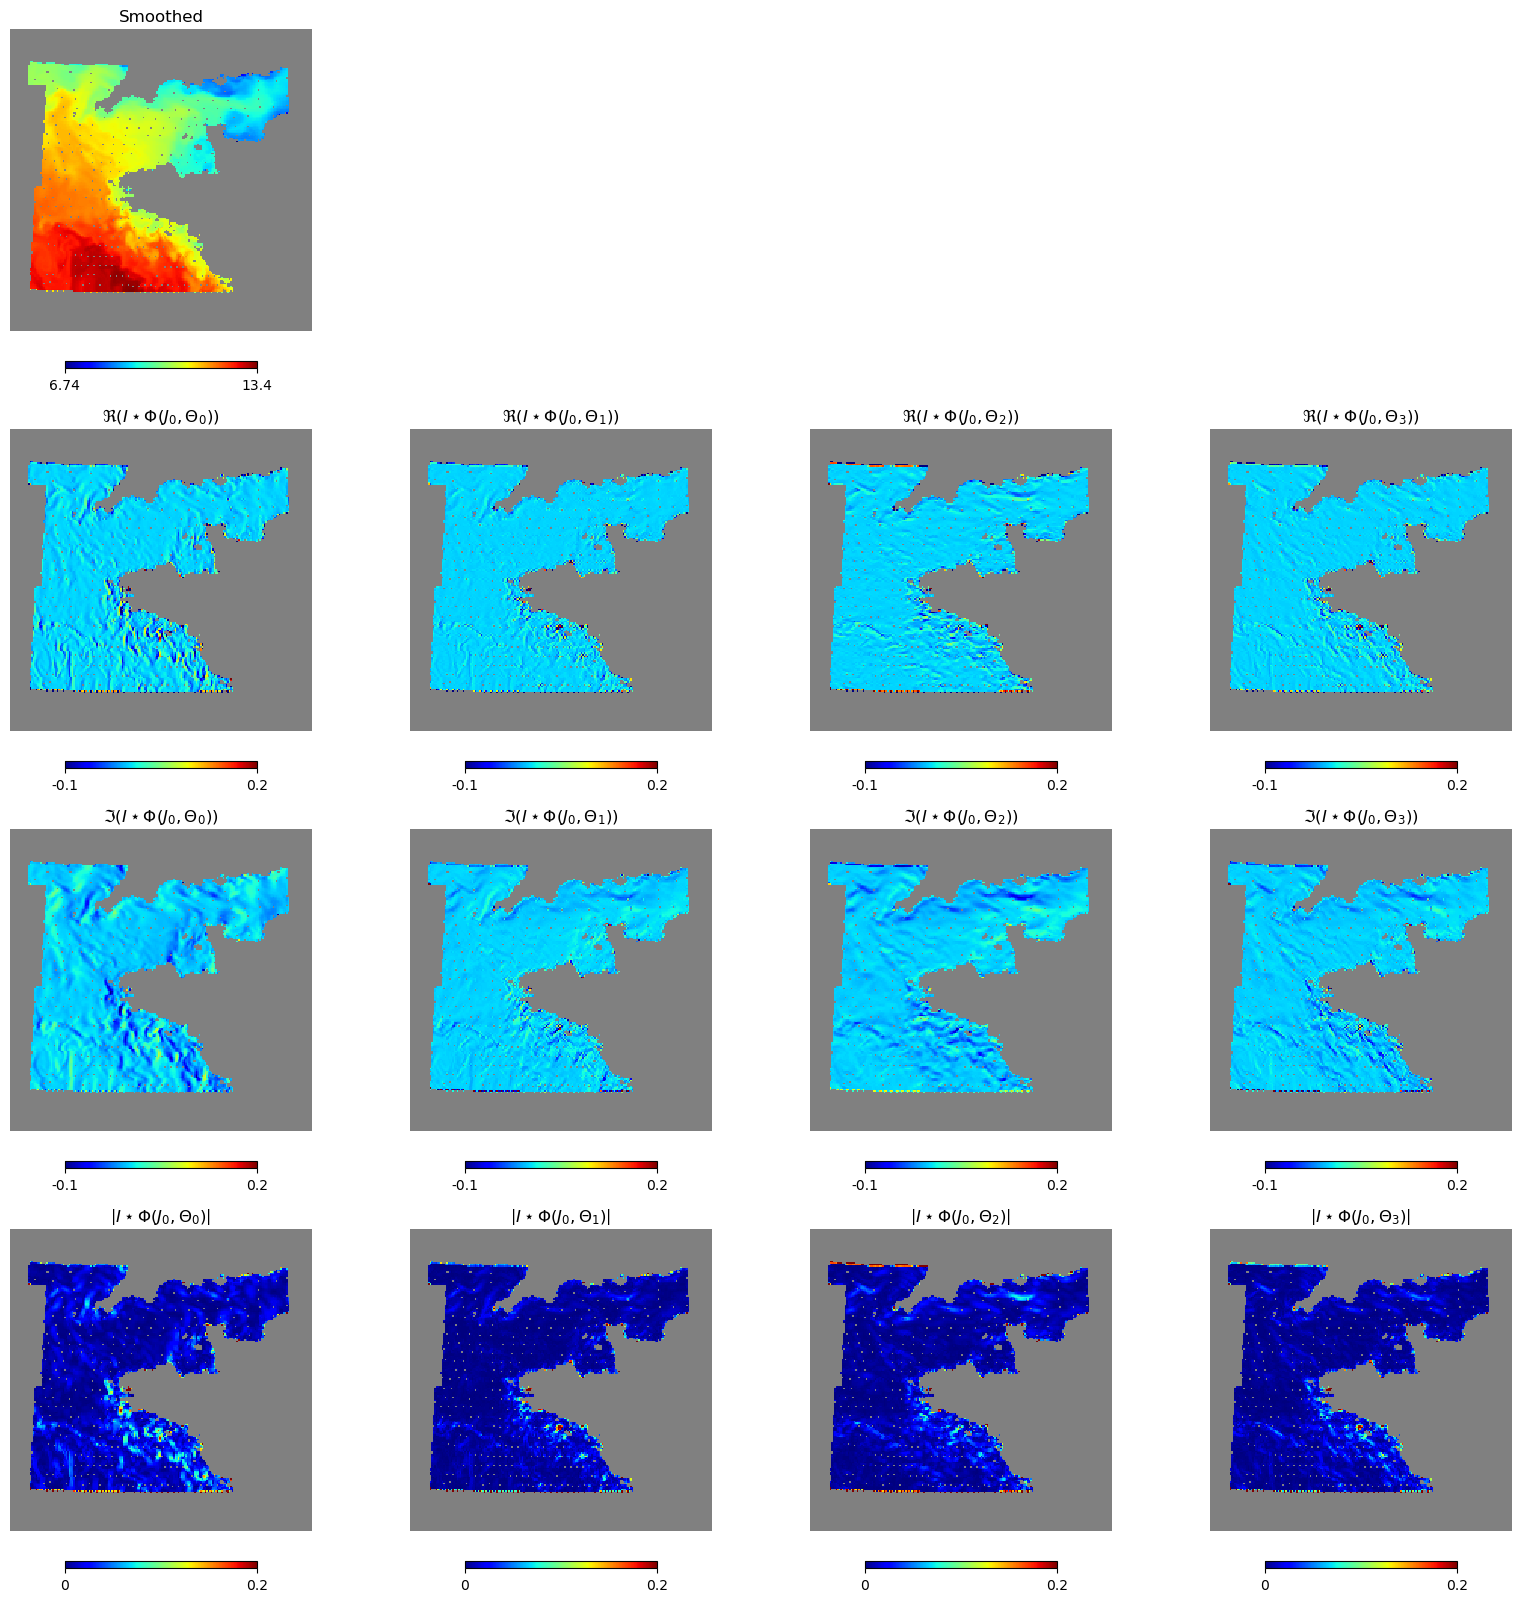

In [8]:
#compute wavelet image
smoothed_image = scat.convol(scat.backend.bk_cast(data[None,:]),cell_ids=cell_ids,nside=nside)

#plot smoothed and unsmoothed images
plt.figure(figsize=(16,16))
plot_result(data,cell_ids,nside,hold=False,sub=(4,4,1),title='Smoothed')
for k in range(4):
    plot_result(smoothed_image.cpu().numpy()[0,k,:].real,cell_ids,nside,hold=False,sub=(4,4,5+k),
                title=r'$\Re\left(I\star\Phi(J_0,\Theta_%d)\right)$'%(k),vmin=-0.1,vmax=0.2)
    plot_result(smoothed_image.cpu().numpy()[0,k,:].imag,cell_ids,nside,hold=False,sub=(4,4,9+k),
                title=r'$\Im\left(I\star\Phi(J_0,\Theta_%d)\right)$'%(k),vmin=-0.1,vmax=0.2)
    plot_result(abs(smoothed_image.cpu().numpy()[0,k,:]),cell_ids,nside,hold=False,sub=(4,4,13+k),
                title=r'$\left|I\star\Phi(J_0,\Theta_%d)\right|$'%(k),vmin=0,vmax=0.2)

The next cell shows the wavelet decomposition across multiple scales. Each successive scale $J_1, \dots, J_4$ corresponds to a larger spatial scale and is computed at a lower resolution.

This computation—and the definition itself—is efficient when using the 'nested' ordering, as downsampling an image simply involves averaging the values of the four child `cell_ids` from the higher resolution.

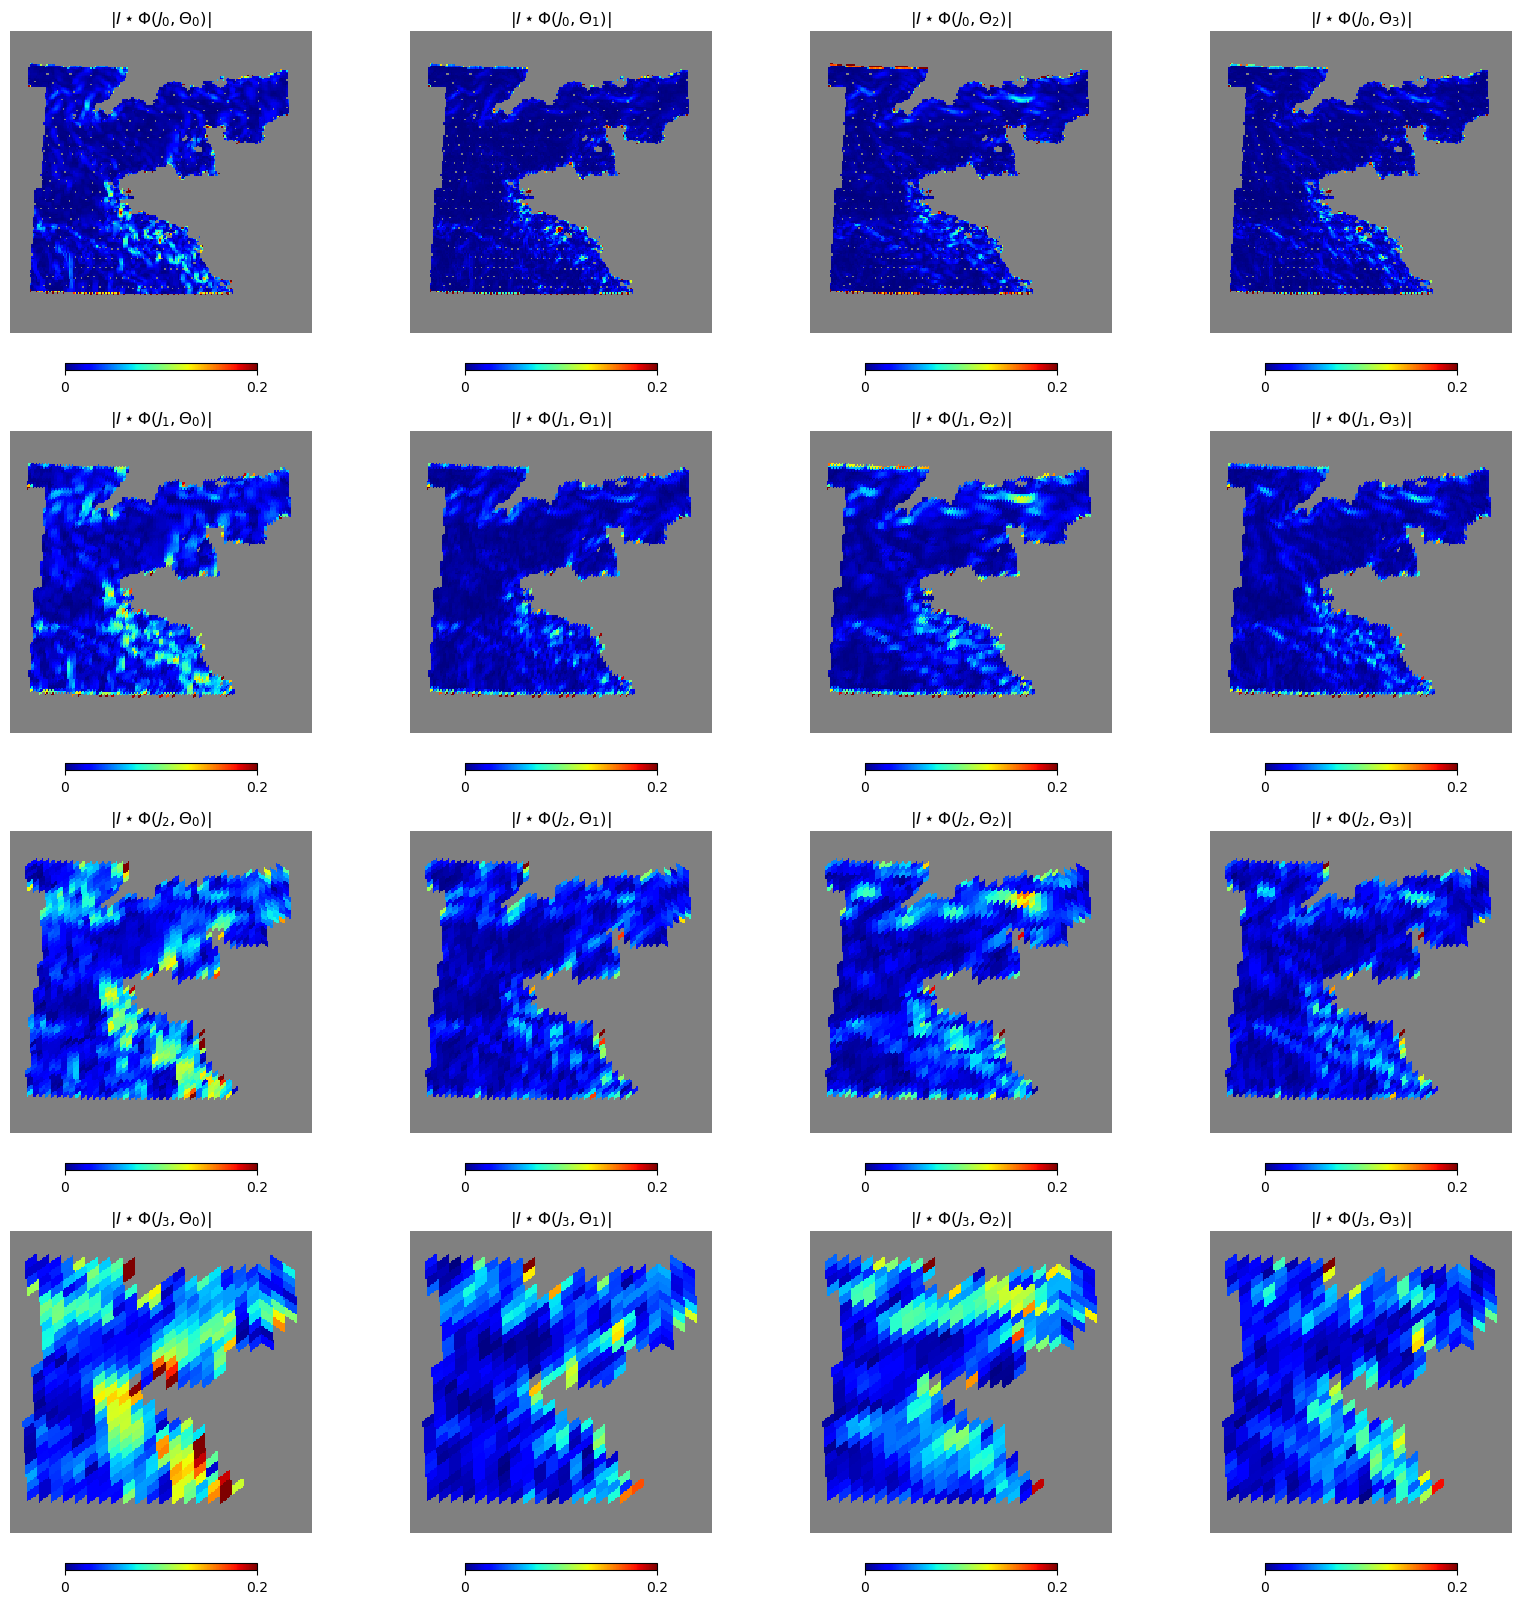

In [9]:
l_data=scat.backend.bk_cast(data[None,:]-np.median(data))

plt.figure(figsize=(16,16))
l_nside=nside
l_cell_ids=cell_ids.copy()
nscale=4
for l in range(nscale):
    wave=scat.convol(l_data,cell_ids=l_cell_ids,nside=l_nside)
    for k in range(4):
        plot_result(abs(scat.backend.to_numpy(wave)[0,k,:]),
                    scat.backend.to_numpy(l_cell_ids),
                    l_nside,hold=False,
                    sub=(nscale,4,1+k+4*l),unit='',title=r'$|I\star\Phi(J_%d,\Theta_%d)|$'%(l,k),vmin=0,vmax=0.2)
    l_data=scat.smooth(l_data,cell_ids=l_cell_ids,nside=l_nside)
    l_data,l_cell_ids=scat.ud_grade_2(l_data,cell_ids=l_cell_ids,nside=l_nside)
    l_nside//=2

### Use FOSCAT to compute the Scattering Covariance

The next cell demonstrates how to estimate the Scattering Covariance (SC) of the input data compared to white noise. The resulting plot of the SC coefficients clearly shows that the dynamics of the sea surface temperature (SST) are far from resembling white noise — a distinction that is clearly identifiable.

In the next section, this notebook illustrates how to use these statistical properties to synthesize data that reproduces the same statistics, starting from white noise.

In [10]:
scat.clean_norm()
scat_in=scat.eval(data-np.median(data),Jmax=5,cell_ids=cell_ids,nside=nside,norm='auto')
scat_in=scat.eval(data-np.median(data),Jmax=5,cell_ids=cell_ids,nside=nside,norm='auto')
scat_noise=scat.eval(np.random.randn(data.shape[0])*np.std(data),Jmax=5,cell_ids=cell_ids,nside=nside,norm='auto')

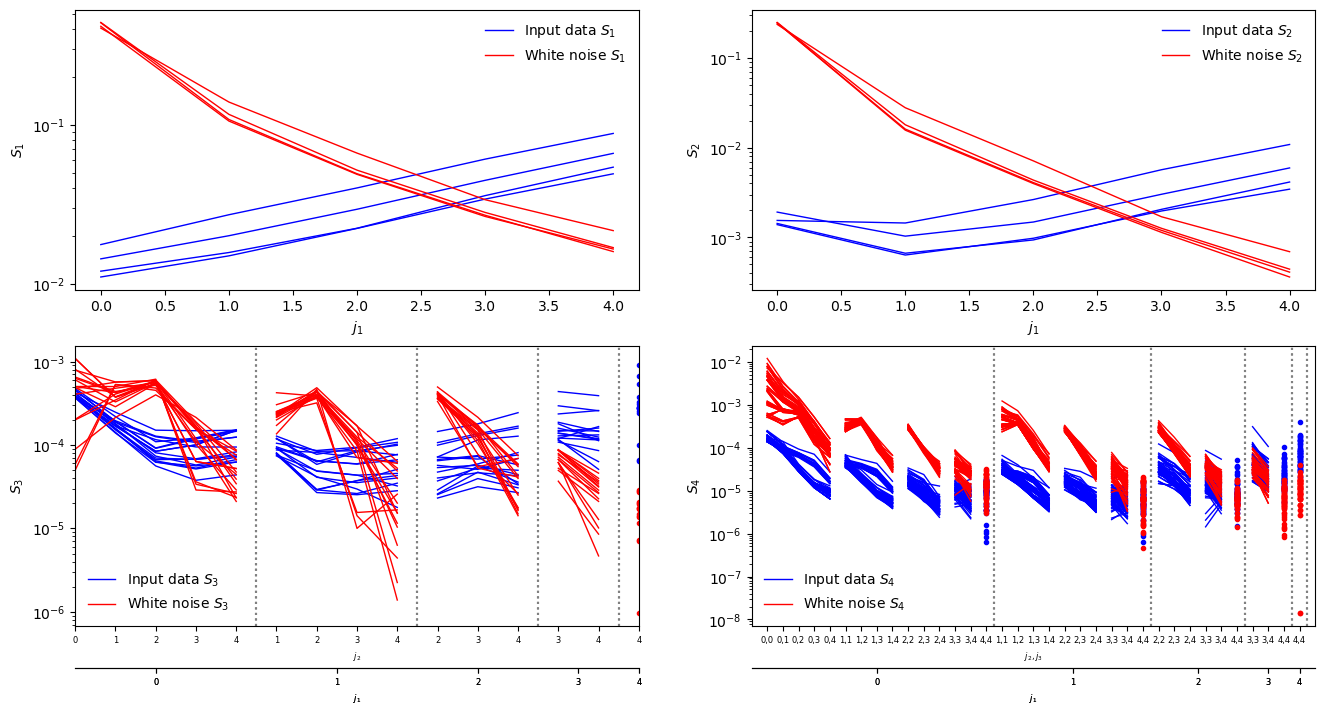

In [11]:
scat_in.plot(color='b',name='Input data')
scat_noise.plot(hold=False,color='r',name='White noise')

# Synthesize data using **FOSCAT**

The synthesis process using **FOSCAT** is documented in other notebooks. Here, the focus is on working with a reduced number of `cell_ids` over a limited domain. This is particularly important in Earth observation, where spatial resolution can be very high, and large-scale correlations are critical. For this reason, the synthesis should be performed on a spherical grid.

### The Method

* **Step 1**: The user must define a loss function. In this example, the loss is the quadratic difference between the SC (Scattering Covariance) coefficients of the synthesized map and those of the original data.
* **Step 2**: The reference SC coefficients and their variances are computed over the target data domain. These variances are then used to weight each coefficient in the loss function.
* **Step 3**: The synthesis is performed using an **L-BFGS** algorithm based on gradient descent.

In [12]:
# step 1

def The_loss(u,scat_operator,args):
    ref  = args[0]
    sref = args[1]
    cell_ids =args[2]
    nside = args[3]

    # compute scattering covariance of the current synthetised map called u
    learn=scat_operator.eval(u,norm='auto',cell_ids=cell_ids,nside=nside,Jmax=5)

    #learn=scat_operator.reduce_sum_batch(learn)
    
    # make the difference withe the reference coordinates
    loss=scat_operator.reduce_distance(learn,ref,sigma=sref)
    
    return(loss)

In [13]:
# step 2
scat.clean_norm()
ref=scat.eval(data-np.median(data),Jmax=5,cell_ids=cell_ids,nside=nside,norm='auto')
ref,sref=scat.eval(data-np.median(data),Jmax=5,cell_ids=cell_ids,nside=nside,calc_var=True,norm='auto')

loss=synthe.Loss(The_loss,scat,ref,sref,cell_ids,nside)

sy = synthe.Synthesis([loss])

In [14]:
#loop on smooth to produce smoothed map
sdata=scat.smooth(data,cell_ids=cell_ids,nside=nside)
for k in range(14):
    sdata=scat.smooth(sdata,cell_ids=cell_ids,nside=nside)

In [15]:
#repeat the smooth data and add a small noise to emulate 100 maps

imap=np.random.randn(40,data.shape[0])*np.std(data)*0.1+scat.backend.to_numpy(sdata).reshape(1,data.shape[0])-np.median(data)

In [16]:
# step 3
omap=scat.to_numpy(sy.run(imap,
            EVAL_FREQUENCY=50,
            NUM_EPOCHS = 500))

Total number of loss  1
Itt      0 L=      39.1 (      39.1 ) 0.341s 
Itt     50 L=      2.28 (      2.28 ) 20.180s 
Itt    100 L=     0.425 (     0.425 ) 19.097s 
Itt    150 L=     0.169 (     0.169 ) 19.293s 
Itt    200 L=    0.0909 (    0.0909 ) 19.378s 
Itt    250 L=     0.058 (     0.058 ) 19.697s 
Itt    300 L=    0.0403 (    0.0403 ) 19.322s 
Itt    350 L=    0.0302 (    0.0302 ) 19.710s 
Itt    400 L=    0.0239 (    0.0239 ) 19.319s 
Itt    450 L=    0.0195 (    0.0195 ) 19.587s 
Itt    500 L=    0.0164 (    0.0164 ) 19.828s 
Final Loss  0.016356725245714188


### Plot the result

The synthesized data is not identical to the target, but it exhibits similar statistical behavior.


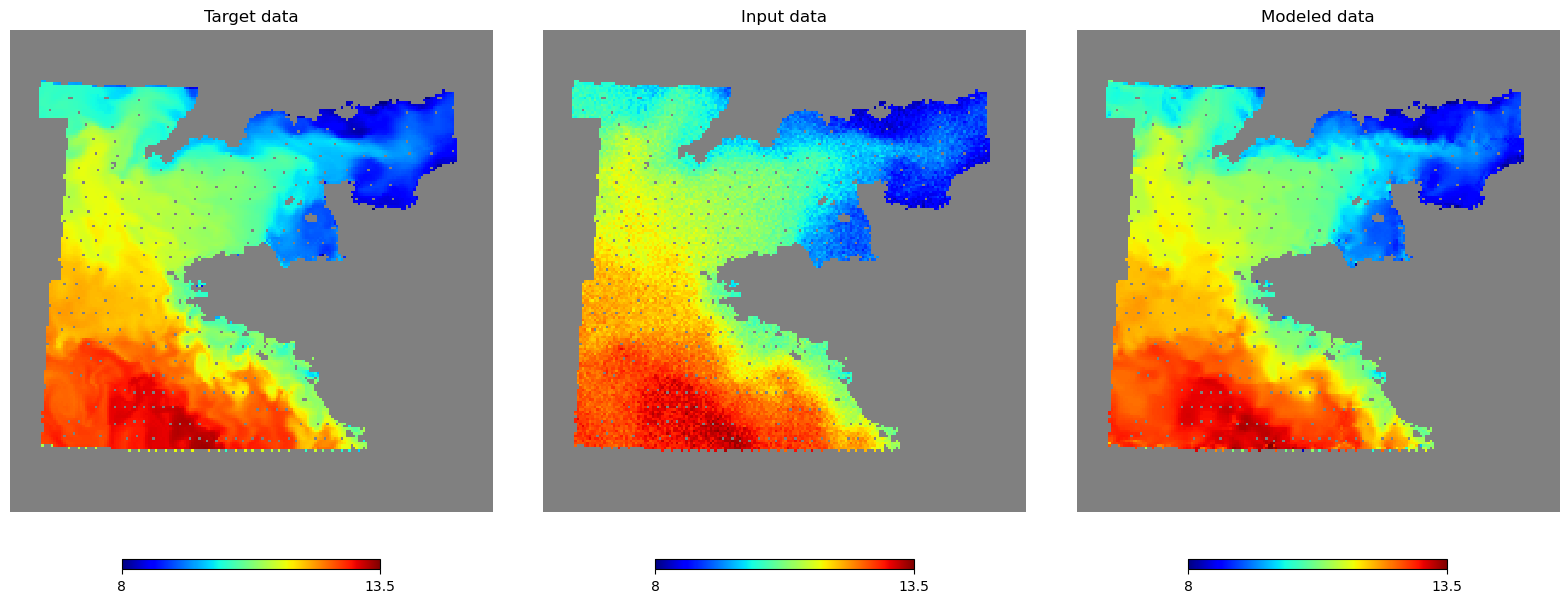

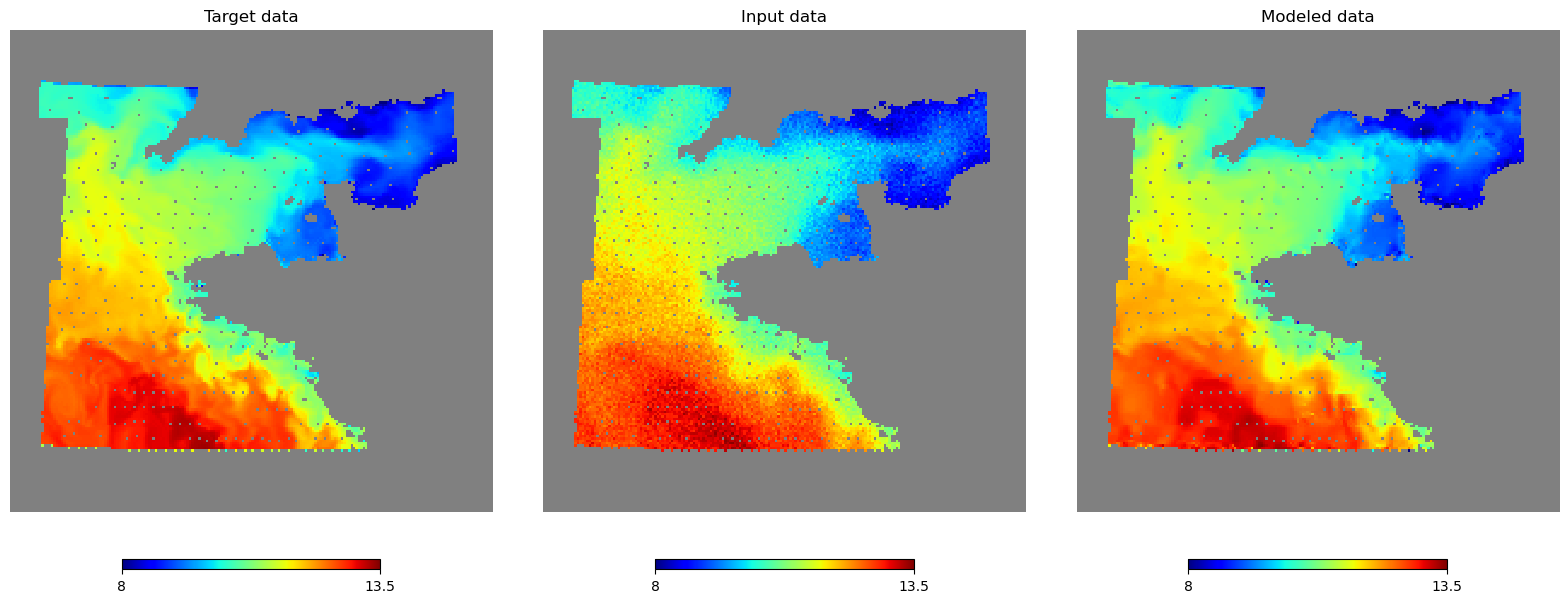

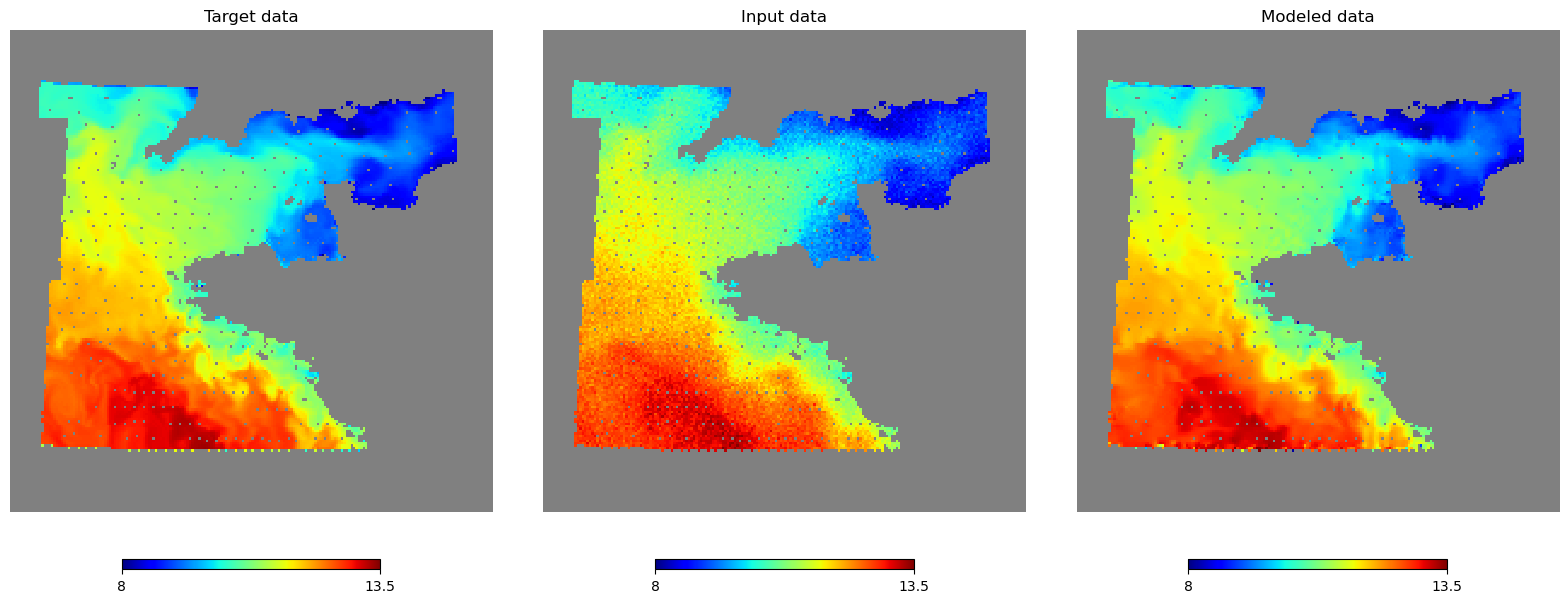

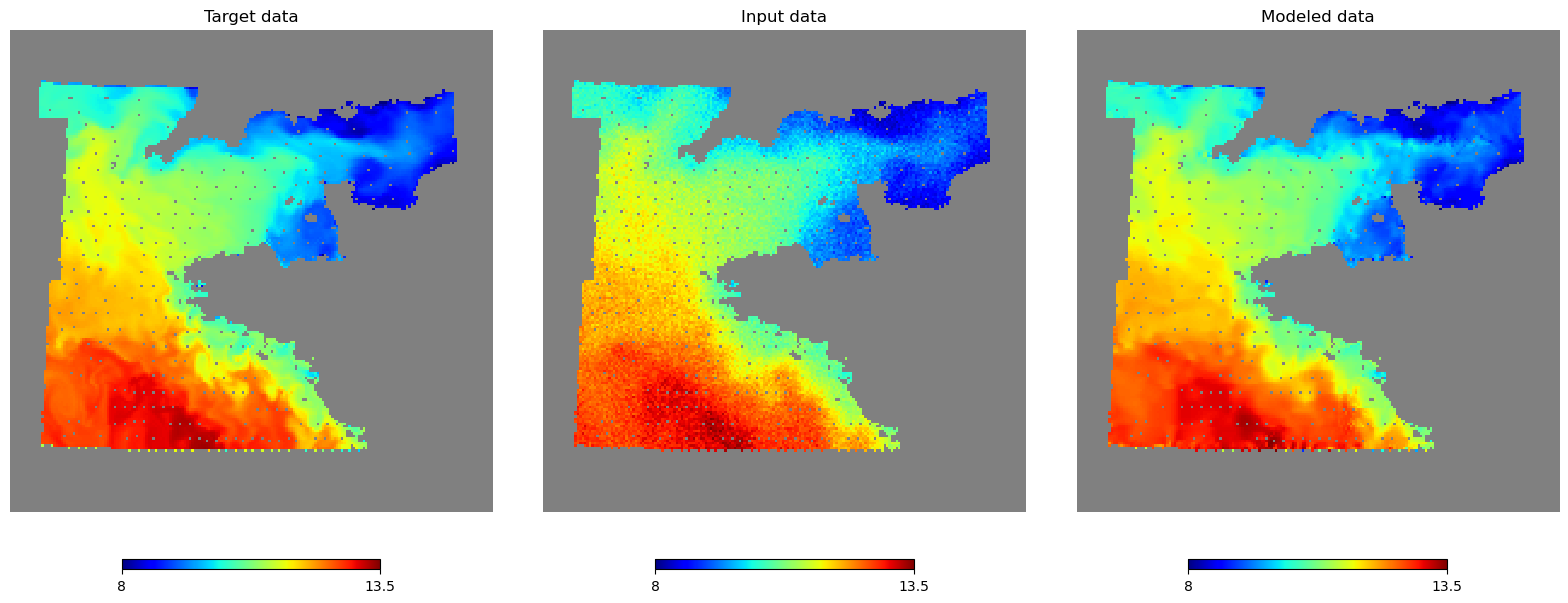

In [17]:
for k in range(np.min([4,imap.shape[0]])):
    plt.figure(figsize=(16,6))
    plot_result(data,cell_ids,nside,hold=False,sub=(1,3,1),title='Target data',vmin=8,vmax=13.5)
    plot_result(imap[k]+np.median(data),cell_ids,nside,hold=False,sub=(1,3,2),title='Input data',vmin=8,vmax=13.5)
    plot_result(omap[k]+np.median(data),cell_ids,nside,hold=False,sub=(1,3,3),title='Modeled data',vmin=8,vmax=13.5)

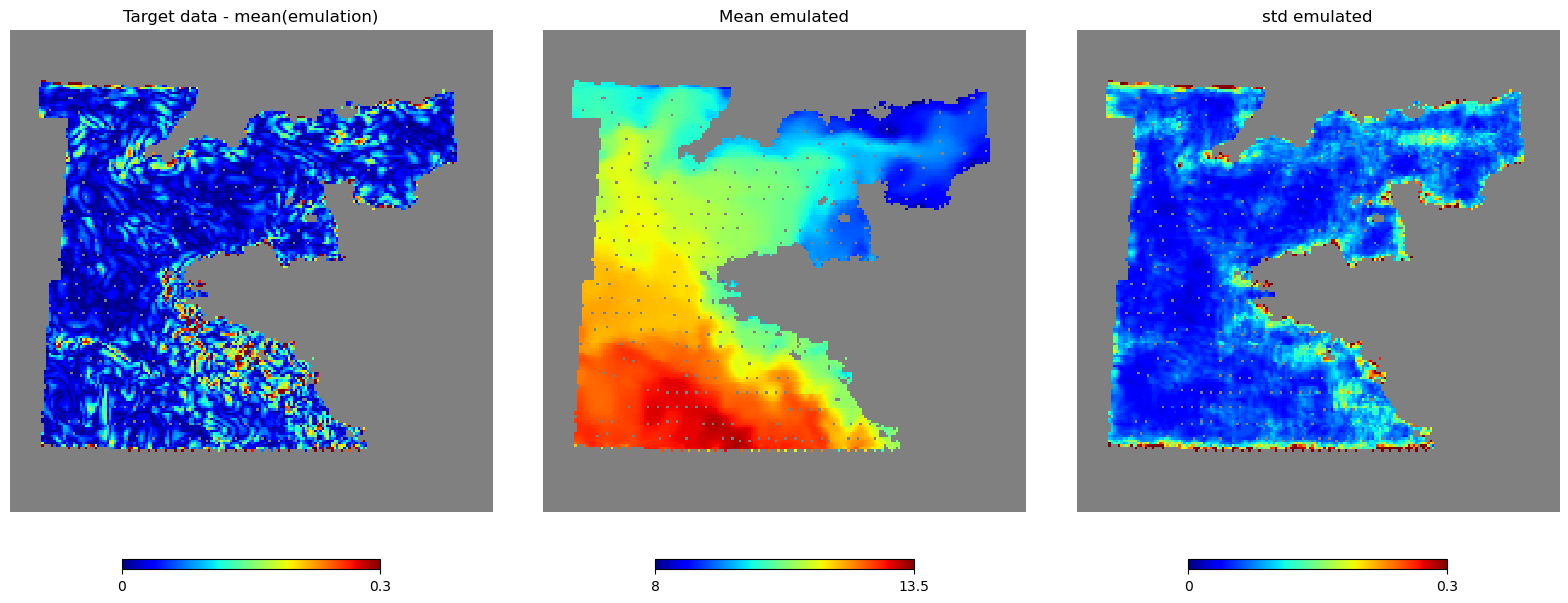

In [18]:
plt.figure(figsize=(16,6))
plot_result(abs(np.mean(omap,0)-data+np.median(data)),cell_ids,nside,hold=False,sub=(1,3,1),title='Target data - mean(emulation)',vmin=0.,vmax=0.3)
plot_result(np.mean(omap,0)+np.median(data),cell_ids,nside,hold=False,sub=(1,3,2),title='Mean emulated',vmin=8,vmax=13.5)
plot_result(np.std(omap,0),cell_ids,nside,hold=False,sub=(1,3,3),title='std emulated',vmin=0,vmax=0.3)

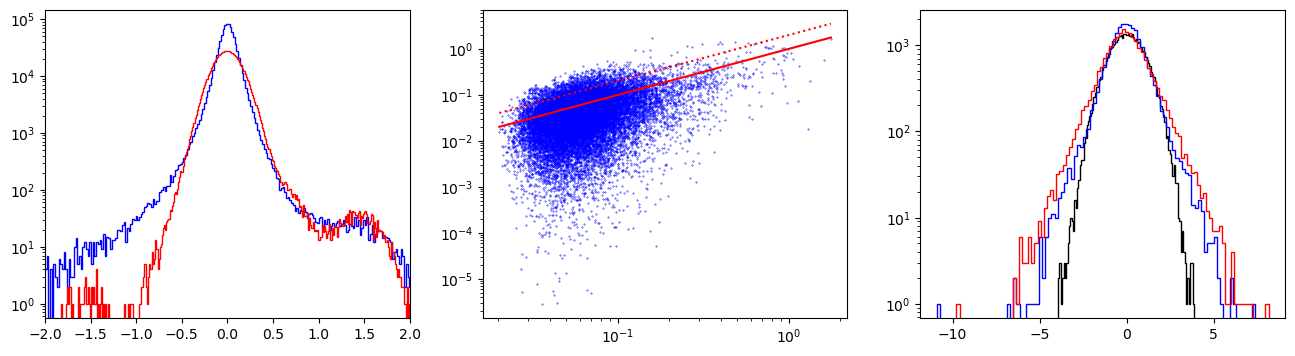

In [19]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist((omap-data+np.median(data)).flatten(),bins=400,color='b',histtype='step')
plt.hist((imap-data+np.median(data)).flatten(),bins=400,color='r',histtype='step')
plt.yscale('log')
plt.xlim(-2,2)
plt.subplot(1,3,2)
plt.scatter(np.std(omap,0),abs(np.mean(omap,0)-data+np.median(data)),color='b',s=0.1)
x1=np.min(np.std(omap,0))
x2=np.max(np.std(omap,0))
plt.plot([x1,x2],[x1,x2],color='r')
plt.plot([x1,x2],[2*x1,2*x2],':',color='r')
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,3,3)
plt.hist(np.random.randn(omap.shape[1]*2),bins=100,color='black',histtype='step')
plt.hist((np.mean(omap,0)-data+np.median(data)).flatten()/np.std(omap,0).flatten(),bins=100,color='b',histtype='step')
plt.hist((np.mean(imap,0)-data+np.median(data)).flatten()/np.std(omap,0).flatten(),bins=100,color='r',histtype='step')
plt.yscale('log')